## About Dataset


### Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

### Data Description</br>
**7043 observations with 33 variables** 

**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State:** The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long:** The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_theme(style= 'darkgrid')

In [3]:
customer_churn = pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
customer_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
customer_churn.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
6124,1722-LDZJS,1,United States,California,Sanger,93657,"36.819628, -119.440414",36.819628,-119.440414,Male,...,One year,No,Credit card (automatic),20.20,1068.15,No,0,22,6050,NaN
4493,6999-CHVCF,1,United States,California,Covina,91723,"34.084747, -117.886844",34.084747,-117.886844,Male,...,Two year,Yes,Bank transfer (automatic),102.10,7149.35,No,0,62,5228,NaN
1267,5707-ORNDZ,1,United States,California,Yuba City,95993,"39.075694, -121.70606",39.075694,-121.706060,Male,...,Month-to-month,No,Electronic check,54.55,494.05,Yes,1,79,4656,Network reliability
323,5565-FILXA,1,United States,California,Yosemite National Park,95389,"37.704267, -119.607001",37.704267,-119.607001,Female,...,Month-to-month,Yes,Electronic check,96.15,1529.2,Yes,1,96,5913,Don't know
401,3703-VAVCL,1,United States,California,Strawberry Valley,95981,"39.58458, -121.093256",39.584580,-121.093256,Male,...,Month-to-month,No,Credit card (automatic),90.00,190.05,Yes,1,99,3902,Competitor made better offer


In [6]:
customer_churn.columns = customer_churn.columns.str.lower().str.replace(' ', '_')

In [7]:
customer_churn.sample(5)

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
4993,0307-BCOPK,1,United States,California,San Francisco,94134,"37.721052, -122.413573",37.721052,-122.413573,Female,...,One year,No,Mailed check,19.05,326.65,No,0,60,4336,NaN
6963,2371-KFUOG,1,United States,California,Escondido,92025,"33.081478, -117.033814",33.081478,-117.033814,Male,...,One year,No,Bank transfer (automatic),99.15,5720.95,No,0,26,6409,NaN
240,4208-UFFGW,1,United States,California,Byron,94514,"37.83323, -121.601461",37.833230,-121.601461,Male,...,Month-to-month,No,Mailed check,44.95,85.15,Yes,1,84,5900,Don't know
5666,3970-XGJDU,1,United States,California,West Hills,91307,"34.199787, -118.68493",34.199787,-118.684930,Female,...,Two year,Yes,Credit card (automatic),19.20,1123.65,No,0,64,4937,NaN
4232,5501-TVMGM,1,United States,California,Canby,96015,"41.486953, -120.913975",41.486953,-120.913975,Male,...,Month-to-month,Yes,Electronic check,55.25,55.25,No,0,49,3255,NaN


In [8]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [9]:
customer_churn.shape

(7043, 33)

In [10]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [11]:
customer_churn.gender = (customer_churn.gender == 'Male').astype('int')
customer_churn.senior_citizen = (customer_churn.senior_citizen == 'Male').astype('int')

In [12]:
customer_churn.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [13]:
customer_churn.isnull().sum().value_counts(ascending=False)

0       32
5174     1
Name: count, dtype: int64

In [14]:
customer_churn.isnull().sum()

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_score             0
cltv                    0
churn_reason         5174
dtype: int64

In [15]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
zip_code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
gender,7043.0,0.504756,0.500013,0.000000,0.000000,1.000000,1.000000,1.000000
senior_citizen,7043.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tenure_months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
monthly_charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
churn_value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
churn_score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000


In [16]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [17]:
redundants = ['customerid','country', 'state', 'city', 'count', 'zip_code', 'lat_long', 'latitude', 
              'longitude', 'partner', 'dependents', 'churn_label', 'churn_reason']

customer_churn.drop(redundants, axis = 1, inplace=True)

In [18]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int32  
 1   senior_citizen     7043 non-null   int32  
 2   tenure_months      7043 non-null   int64  
 3   phone_service      7043 non-null   object 
 4   multiple_lines     7043 non-null   object 
 5   internet_service   7043 non-null   object 
 6   online_security    7043 non-null   object 
 7   online_backup      7043 non-null   object 
 8   device_protection  7043 non-null   object 
 9   tech_support       7043 non-null   object 
 10  streaming_tv       7043 non-null   object 
 11  streaming_movies   7043 non-null   object 
 12  contract           7043 non-null   object 
 13  paperless_billing  7043 non-null   object 
 14  payment_method     7043 non-null   object 
 15  monthly_charges    7043 non-null   float64
 16  total_charges      7043 

In [19]:
remove_charges = customer_churn[customer_churn['total_charges']==' ']
remove_charges

,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
2234,0,0,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,36,2578
2438,1,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,68,5504
2568,0,0,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0,45,2048
2667,1,0,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,48,4950
2856,0,0,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0,30,4740
4331,1,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,53,2019
4687,1,0,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,49,2299
5104,0,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,27,3763
5719,1,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,69,4890
6772,0,0,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0,44,2342


In [20]:
customer_churn.drop(customer_churn[customer_churn['total_charges']==' '].index, inplace=True)

In [21]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   int32  
 1   senior_citizen     7032 non-null   int32  
 2   tenure_months      7032 non-null   int64  
 3   phone_service      7032 non-null   object 
 4   multiple_lines     7032 non-null   object 
 5   internet_service   7032 non-null   object 
 6   online_security    7032 non-null   object 
 7   online_backup      7032 non-null   object 
 8   device_protection  7032 non-null   object 
 9   tech_support       7032 non-null   object 
 10  streaming_tv       7032 non-null   object 
 11  streaming_movies   7032 non-null   object 
 12  contract           7032 non-null   object 
 13  paperless_billing  7032 non-null   object 
 14  payment_method     7032 non-null   object 
 15  monthly_charges    7032 non-null   float64
 16  total_charges      7032 non-n

In [22]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.00,1.0000,1.00
senior_citizen,7032.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00
tenure_months,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
churn_value,7032.0,0.265785,0.441782,0.00,0.0000,0.00,1.0000,1.00
churn_score,7032.0,58.715301,21.531321,5.00,40.0000,61.00,75.0000,100.00
cltv,7032.0,4401.445108,1182.414266,2003.00,3469.7500,4527.50,5381.0000,6500.00


In [23]:
# customer_churn['total_charges'].replace(' ', 0, inplace=True)

In [24]:
customer_churn['total_charges'] = customer_churn['total_charges'].astype(float)

In [25]:
customer_churn.reset_index()

,index,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,0,1,0,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,1,0,0,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,2,0,0,8,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,3,0,0,28,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,4,1,0,49,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,0,72,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306
7028,7039,1,0,24,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140
7029,7040,0,0,72,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560
7030,7041,0,0,11,No,No phone service,DSL,Yes,No,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793


In [26]:
categorical_columns = customer_churn.select_dtypes(['object']).columns
numerical_columns = customer_churn.select_dtypes(include=np.number).columns

In [27]:
customer_churn[categorical_columns]

,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [28]:
customer_churn.head()

,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,1,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,0,0,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,0,0,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,1,0,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [29]:
customer_churn[numerical_columns]

,gender,senior_citizen,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,1,0,2,53.85,108.15,1,86,3239
1,0,0,2,70.70,151.65,1,67,2701
2,0,0,8,99.65,820.50,1,86,5372
3,0,0,28,104.80,3046.05,1,84,5003
4,1,0,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...
7038,0,0,72,21.15,1419.40,0,45,5306
7039,1,0,24,84.80,1990.50,0,59,2140
7040,0,0,72,103.20,7362.90,0,71,5560
7041,0,0,11,29.60,346.45,0,59,2793


In [30]:
categorical_columns

Index(['phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object')

In [31]:
numerical_columns

Index(['gender', 'senior_citizen', 'tenure_months', 'monthly_charges',
       'total_charges', 'churn_value', 'churn_score', 'cltv'],
      dtype='object')

In [32]:
correlation = customer_churn.corr(numeric_only=True).drop('gender')
correlation

,gender,senior_citizen,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
senior_citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure_months,0.005285,NaN,1.000000,0.246862,0.825880,-0.354049,-0.226379,0.396188
monthly_charges,-0.013779,NaN,0.246862,1.000000,0.651065,0.192858,0.133556,0.098565
total_charges,0.000048,NaN,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
churn_value,-0.008545,NaN,-0.354049,0.192858,-0.199484,1.000000,0.664970,-0.128253
churn_score,-0.000431,NaN,-0.226379,0.133556,-0.124312,0.664970,1.000000,-0.080837
cltv,-0.007473,NaN,0.396188,0.098565,0.341837,-0.128253,-0.080837,1.000000


<Axes: >

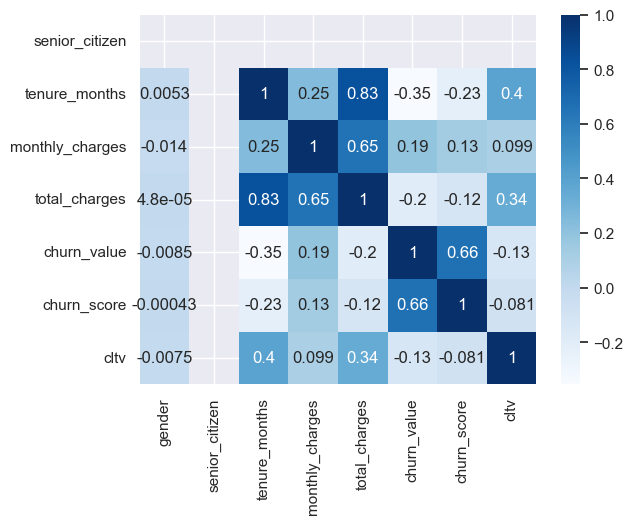

In [33]:
sns.heatmap(correlation, annot=True, cmap="Blues")

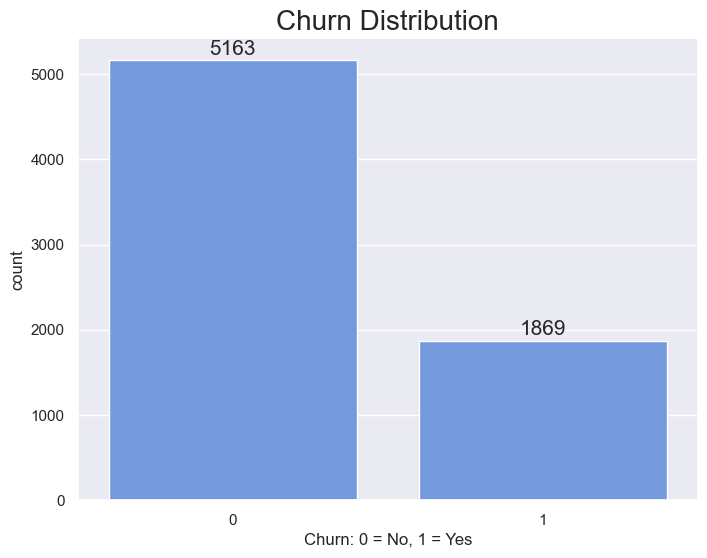

In [34]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="churn_value", data=customer_churn,color='cornflowerblue')
plt.xlabel('Churn: 0 = No, 1 = Yes')
plt.title('Churn Distribution', size = 20)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

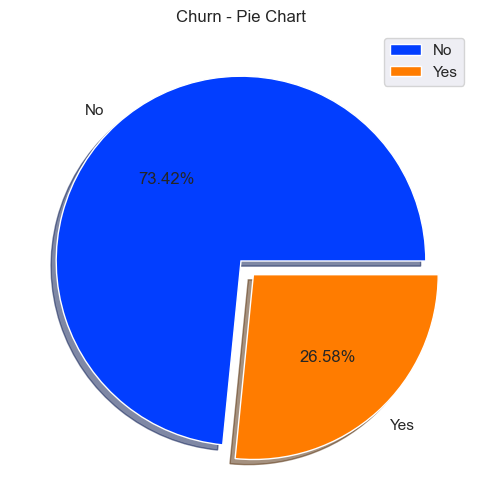

In [35]:
# fig, ax = plt.subplots()
# ax.pie("churn_value", labels=customer_churn, autopct='%1.1f%%')



plt.figure(figsize=(8,6))
explode = [0,0.1]
palette_color = sns.color_palette('bright')
plt.pie(x= customer_churn.churn_value.value_counts(), labels = ['No', 'Yes'], 
        autopct='%1.2f%%', shadow=True, explode = explode, colors=palette_color)
plt.title('Churn - Pie Chart')
plt.legend()
plt.show()



In [36]:
# plt.pie(x="churn_value", data=customer_churn)

In [37]:
customer_churn.churn_value.value_counts()

churn_value
0    5163
1    1869
Name: count, dtype: int64

### ❖	Feature Distribution: </br>
♦	For categorical features (e.g., Contract, PaymentMethod), use bar plots or count plots to visualize how different categories are distributed.</br>
♦	For numerical features (e.g., MonthlyCharges, TotalCharges, Tenure), use histograms or box plots to understand the distribution, central tendency, and any outliers.


In [38]:
customer_churn[categorical_columns]

,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [39]:
customer_churn[numerical_columns]

,gender,senior_citizen,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,1,0,2,53.85,108.15,1,86,3239
1,0,0,2,70.70,151.65,1,67,2701
2,0,0,8,99.65,820.50,1,86,5372
3,0,0,28,104.80,3046.05,1,84,5003
4,1,0,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...
7038,0,0,72,21.15,1419.40,0,45,5306
7039,1,0,24,84.80,1990.50,0,59,2140
7040,0,0,72,103.20,7362.90,0,71,5560
7041,0,0,11,29.60,346.45,0,59,2793


In [40]:
categorical_columns

Index(['phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object')

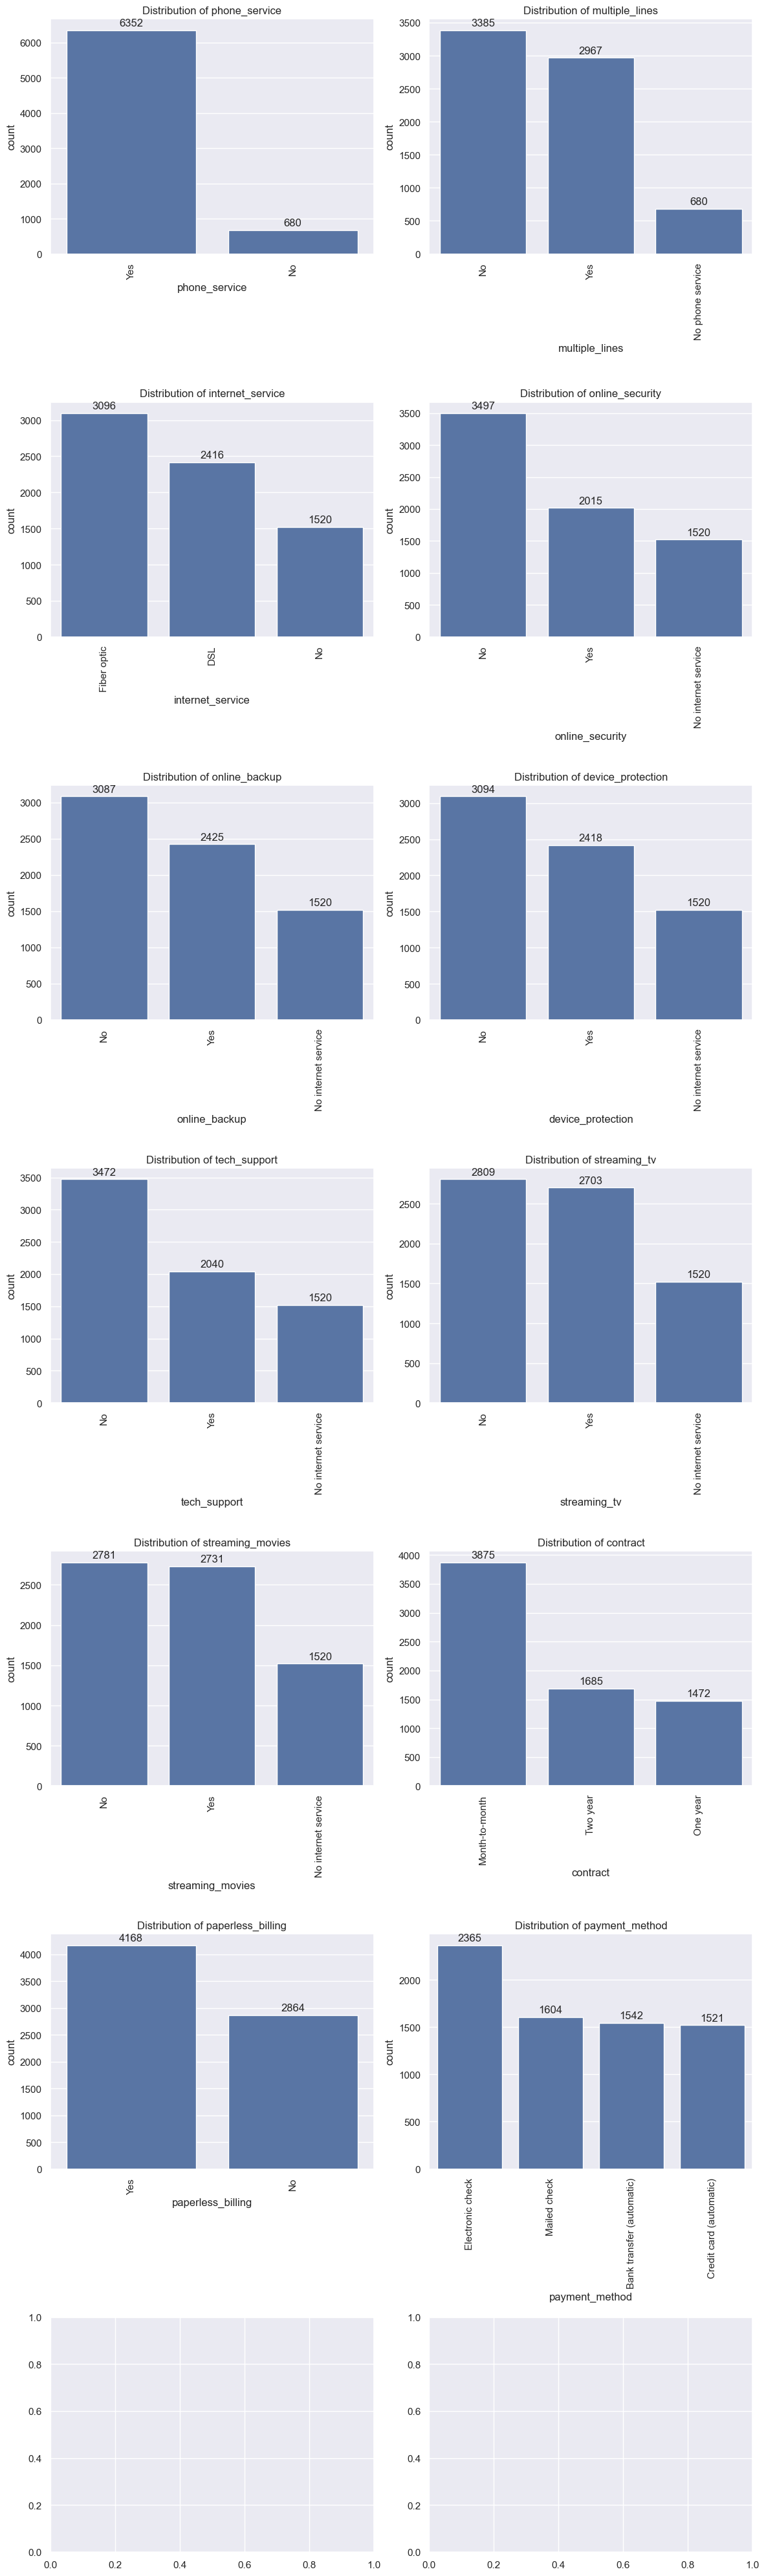

In [41]:
fig, axes = plt.subplots(7, 2, figsize=(12, 40))
for i, col, in enumerate(categorical_columns):
    ax = axes[i//2, i%2]
    sns.countplot(ax = ax, x = col, data = customer_churn, order = customer_churn[col].value_counts().index)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for i in ax.patches:
        ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points');

plt.tight_layout()
plt.show()

gender 
Skew = -0.018776163294286226


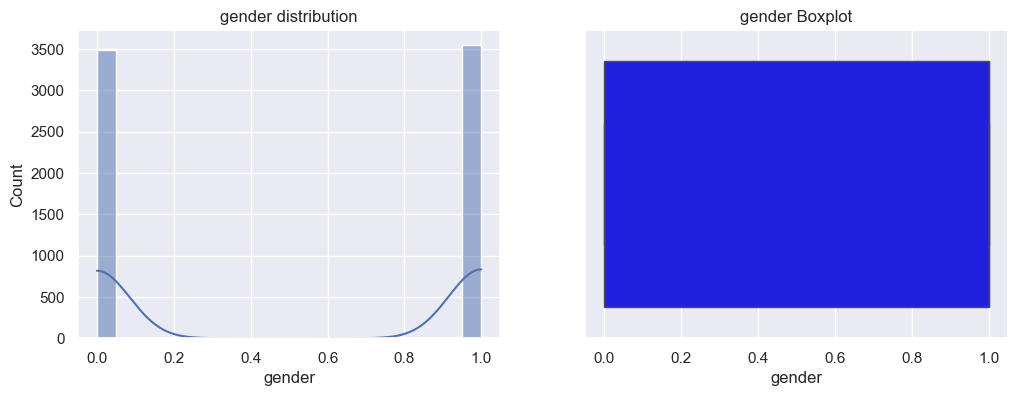

senior_citizen 
Skew = 0.0


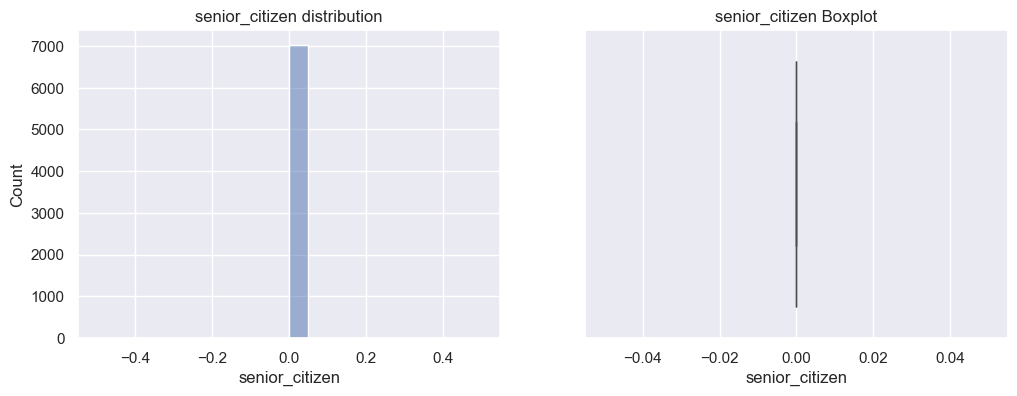

tenure_months 
Skew = 0.23773083190513133


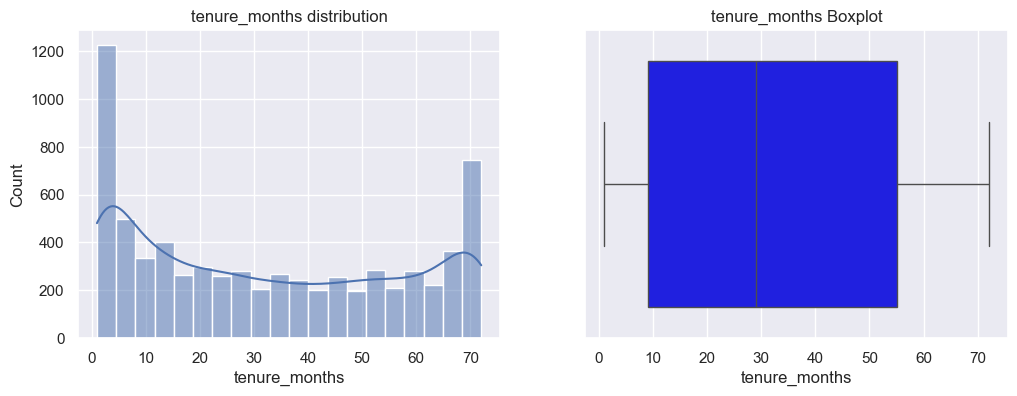

monthly_charges 
Skew = -0.22210292770166232


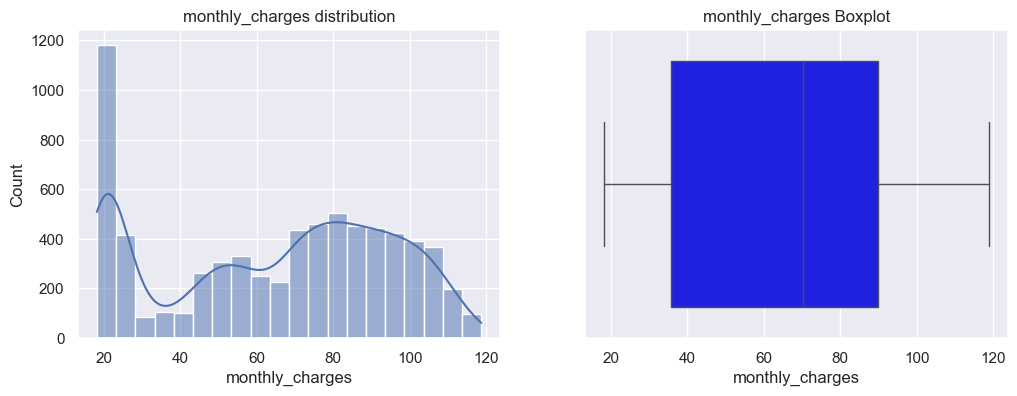

total_charges 
Skew = 0.9616424997242513


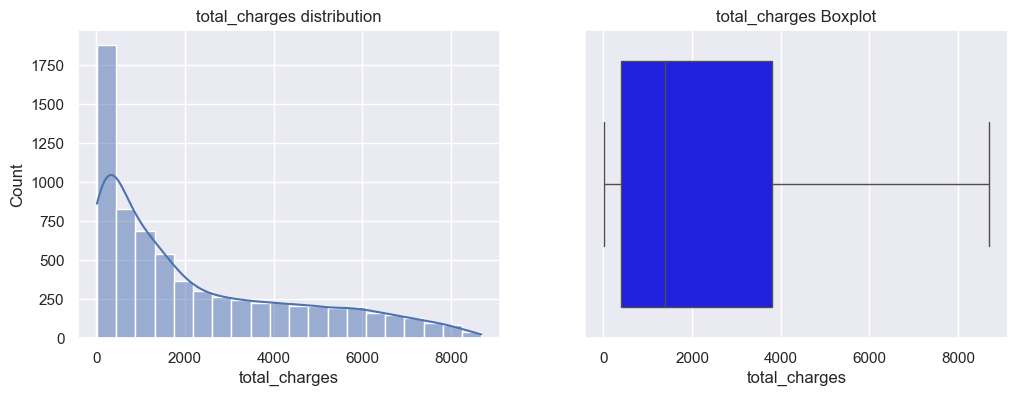

churn_value 
Skew = 1.060621768854348


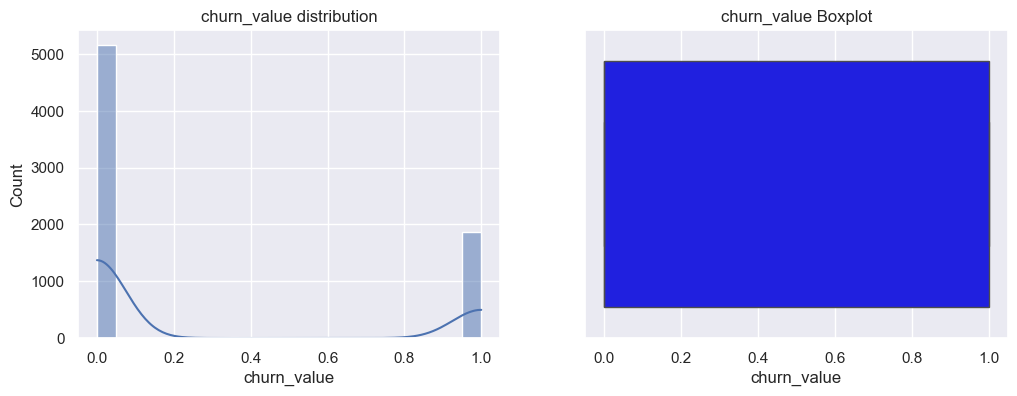

churn_score 
Skew = -0.09107471235065685


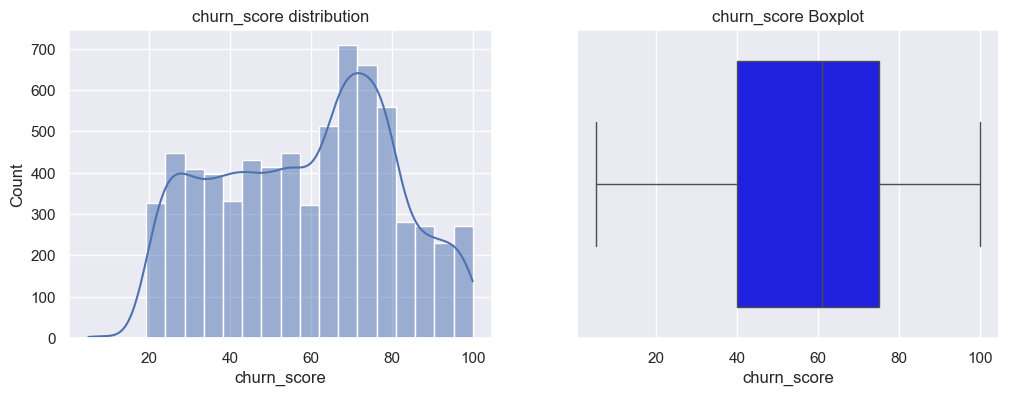

cltv 
Skew = -0.3113273648048447


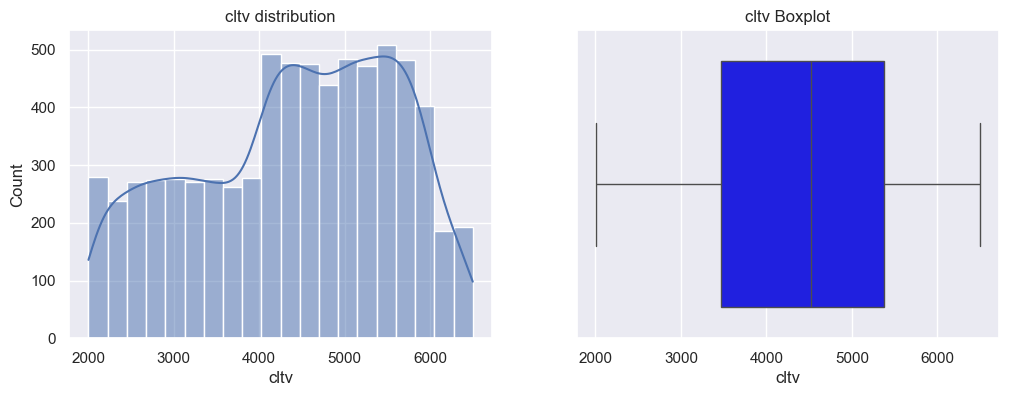

In [42]:
for cols in numerical_columns:
    skewness = customer_churn[cols].skew()
    print(f'{cols} \nSkew = {skewness}')
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_churn[cols], kde=True, bins=20)
    plt.title(f'{cols} distribution')
    plt.xlabel(cols)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=customer_churn[cols], color= 'blue')
    plt.title(f'{cols} Boxplot')
    plt.xlabel(cols)
    plt.show()
    plt.show()

### ❖	Churn Correlation:</br>
♦	Use box plots or violin plots to visualize the relationship between numerical features and churn </br>
♦	For categorical features, use stacked bar plots or grouped bar charts to compare churn rates across categories 


In [43]:
numerical_columns

Index(['gender', 'senior_citizen', 'tenure_months', 'monthly_charges',
       'total_charges', 'churn_value', 'churn_score', 'cltv'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

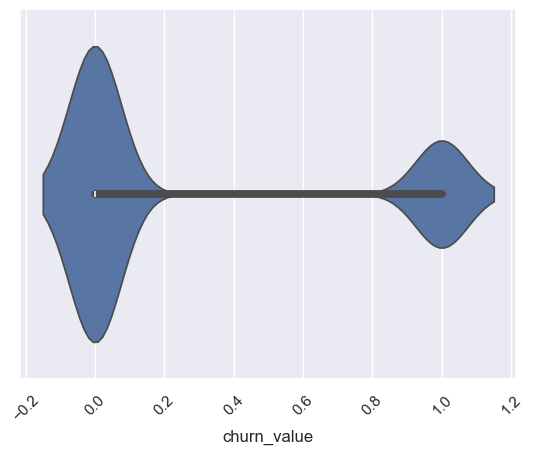

In [44]:
# sns.set_theme(rc={"axes.facecolor":"#e6e6e6",
#             "axes.grid":False,
#             'axes.labelsize':30,
#             'figure.figsize':(5.0, 6.0),
#             'xtick.labelsize':25,
#             'ytick.labelsize':20})


sns.violinplot(data=customer_churn,
               x = 'churn_value')
                #    y = 'Duration',
                #    palette = 'spectral',
            #    order = sorted(customer_churn[numerical_columns]),
            #    notch=True)
plt.xticks(rotation=45)
# l = plt.xlabel('')
# plt.ylabel('Duration (min)')
# plt.text(4.85,200, "Violin Plot", fontsize = 95, color="black", fontstyle='italic')
plt.show

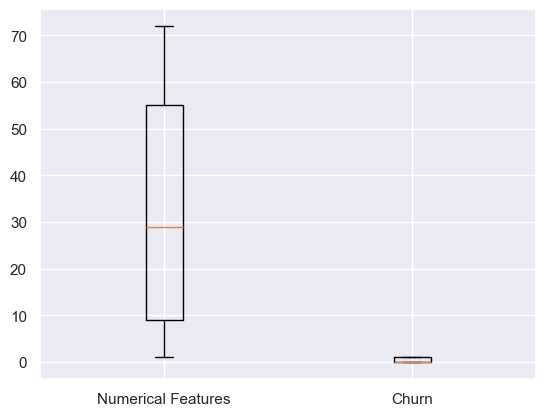

In [45]:
fig, ax = plt.subplots()
ax.boxplot([customer_churn["tenure_months"], customer_churn["churn_value"]])
ax.set_xticklabels(["Numerical Features", "Churn"])
# ax.set_ylabel("col")
plt.show()

In [46]:
# plt.figure(figsize=(13, 17))
# sns.pairplot(data=df.drop(['Kilometers_Driven', 'Price'], axis=1))
# plt.show()

<Axes: xlabel='churn_value'>

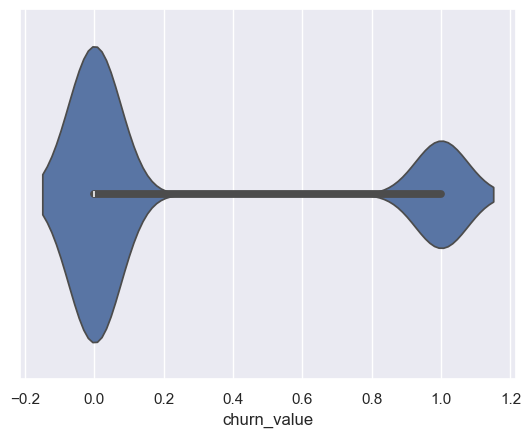

In [47]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

<Axes: xlabel='churn_value'>

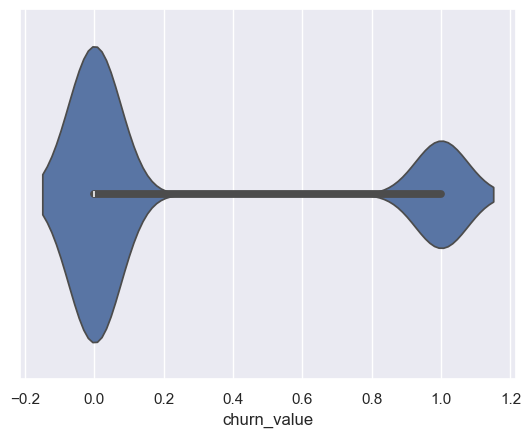

In [48]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

In [49]:
customer_churn[numerical_columns]

,gender,senior_citizen,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,1,0,2,53.85,108.15,1,86,3239
1,0,0,2,70.70,151.65,1,67,2701
2,0,0,8,99.65,820.50,1,86,5372
3,0,0,28,104.80,3046.05,1,84,5003
4,1,0,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...
7038,0,0,72,21.15,1419.40,0,45,5306
7039,1,0,24,84.80,1990.50,0,59,2140
7040,0,0,72,103.20,7362.90,0,71,5560
7041,0,0,11,29.60,346.45,0,59,2793


In [50]:
customer_churn[categorical_columns]

for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace(' ', '_')

customer_churn[categorical_columns]
for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace('-', '_')

customer_churn[categorical_columns]

,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,yes,no,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check
1,yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check
2,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month_to_month,yes,electronic_check
3,yes,yes,fiber_optic,no,no,yes,yes,yes,yes,month_to_month,yes,electronic_check
4,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month_to_month,yes,bank_transfer_(automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,bank_transfer_(automatic)
7039,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check
7040,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic)
7041,no,no_phone_service,dsl,yes,no,no,no,no,no,month_to_month,yes,electronic_check


### 4.	Feature Engineering:
o	Analyze categorical and numerical features.</br>
o	Encode categorical features appropriately (One-Hot Encoding, Label Encoding).</br>
o	Create new features, if relevant, based on customer behavior (e.g., average usage time, frequency of interactions).</br>
### 5.	Data Transformation:
o	Normalize or scale features (e.g., MinMaxScaler or StandardScaler) to ensure consistent scales for all numeric features.</br>


In [51]:
X = customer_churn.drop('churn_value', axis=1)
y = customer_churn['churn_value']

In [52]:
X.shape, y.shape

((7032, 19), (7032,))

In [140]:
from sklearn.compose import ColumnTransformer

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [77]:
categorical_columns

Index(['phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object')

In [141]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_columns)
    ]
)

In [142]:
from sklearn.pipeline import Pipeline

In [144]:
from sklearn.linear_model import LogisticRegression

In [146]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [147]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [158]:
test_pred = pipeline.predict(X_test)

In [159]:
test_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
train_pred = pipeline.predict(X_train)

In [161]:
train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [209]:
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [187]:
r2_score = r2_score(y_test, test_pred)

In [188]:
r2_score

0.5494671536498724

In [189]:
RMSE = root_mean_squared_error(y_test, test_pred)
RMSE

0.3016184724349645

In [194]:
accuracy = accuracy_score(y_train, train_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.16%


In [195]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.90%


In [198]:
precision = precision_score(y_train, train_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 85.45%


In [199]:
precision = precision_score(y_test, test_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 84.86%


In [201]:
recall = recall_score(y_train, train_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 84.46%


In [200]:
recall = recall_score(y_test, test_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 82.28%


In [202]:
f1 = f1_score(y_train, train_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 84.95%


In [203]:
f1 = f1_score(y_test, test_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 83.55%


In [206]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 94.89%


In [207]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 94.27%


In [210]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[954  58]
 [ 70 325]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1012
           1       0.85      0.82      0.84       395

    accuracy                           0.91      1407
   macro avg       0.89      0.88      0.89      1407
weighted avg       0.91      0.91      0.91      1407



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,  # 20% will be used for testing
    random_state=42  # Ensures reproducibility

In [ ]:
scaler = StandardScaler()
model = make_pipeline(scaler, LogisticRegression(max_iter=3000))
model.fit(x_train ,y_train) #train the model
y_pred = model.predict(x_test)# make prediction on test data
accuracy = accuracy_score(y_test, y_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

#model performance evaluation
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#ROC Curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probability estimates for ROC curve
y_proba = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.2f}")
#cross validation 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")

#most important feature # Extract model coefficients
log_reg_model = model.named_steps['logisticregression']
coefficients = log_reg_model.coef_[0]
feature_names = x_train.columns

# Combine feature names with coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)


In [129]:
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore')

In [130]:
Xtrain_cat = encoder.fit_transform(X_train[categorical_columns])

In [131]:
Xtest_cat = encoder.transform(X_test[categorical_columns])

In [132]:
scaler = StandardScaler()

In [133]:
numerical_columns = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']

In [134]:
Xtrain_num = scaler.fit_transform(X_train[numerical_columns])

In [135]:
Xtest_num = scaler.transform(X_test[numerical_columns])

In [136]:
train_processed = np.hstack((Xtrain_num, Xtrain_cat.toarray()))
test_processed = np.hstack((Xtest_num, Xtest_cat.toarray()))

In [143]:
from sklearn.linear_model import LogisticRegression

In [138]:
model = LogisticRegression()

In [139]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'yes'

In [69]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai